# Natural Language Processing for Disaster Tweets
Link to Competition: https://www.kaggle.com/competitions/nlp-getting-started/overview

### Baseline model

Mounted at /content/drive
Num GPUs Available:  0
TensorFlow version: 2.17.1
Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5459 - loss: 0.6860 - val_accuracy: 0.5739 - val_loss: 0.6657
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6137 - loss: 0.6553 - val_accuracy: 0.7768 - val_loss: 0.5881
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7541 - loss: 0.5565 - val_accuracy: 0.7682 - val_loss: 0.5114
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8067 - loss: 0.4440 - val_accuracy: 0.8030 - val_loss: 0.4552
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8498 - loss: 0.3847 - val_accuracy: 0.8056 - val_loss: 0.4449


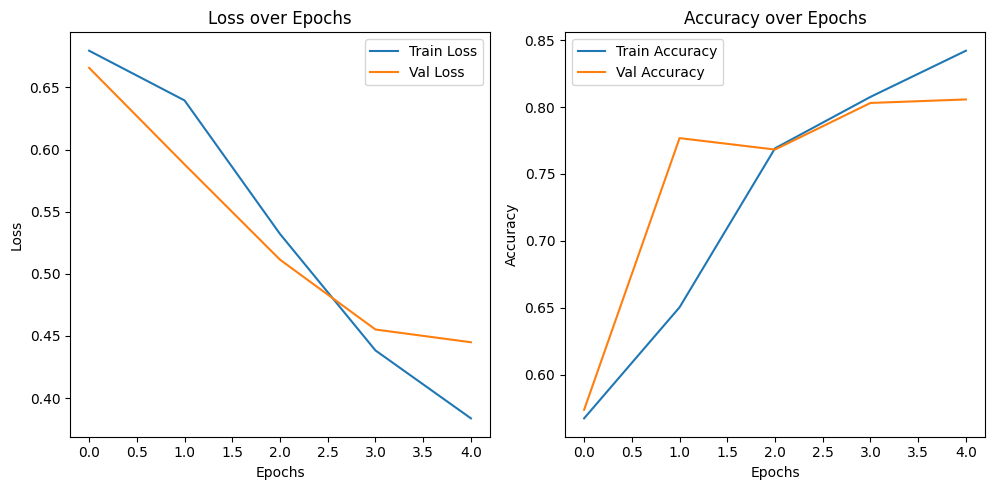

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


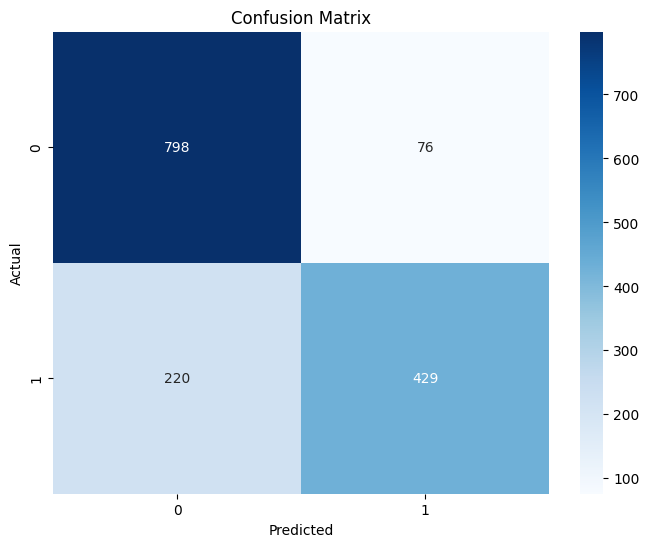

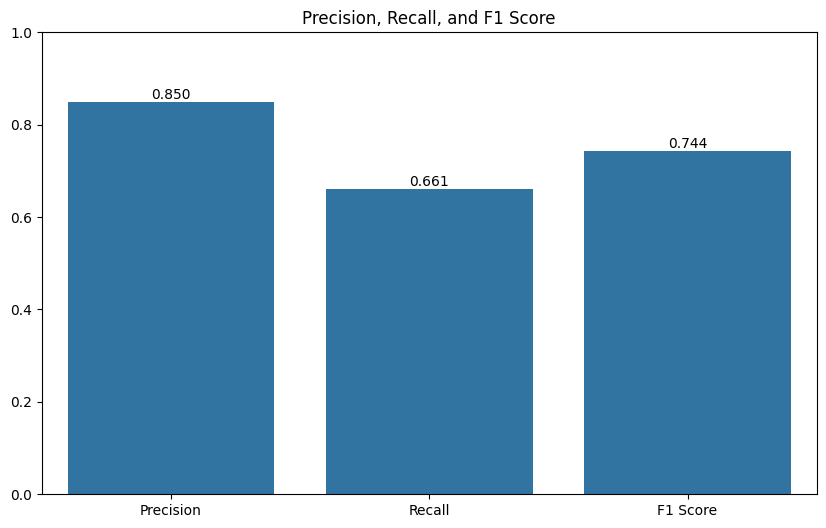


Dataset Statistics:
Training set size: 6090
Validation set size: 1523
Test set size: 3263

Sample Input/Output Pairs:
Input: Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR
Output: 1.0

Input: @ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears
Output: 0.0

Input: Tell @BarackObama to rescind medals of 'honor' given to US soldiers at the Massacre of Wounded Knee. SIGN NOW &amp; RT! https://t.co/u4r8dRiuAc
Output: 1.0

Input: Worried about how the CA drought might affect you? Extreme Weather: Does it Dampen Our Economy? http://t.co/fDzzuMyW8i
Output: 1.0

Input: @YoungHeroesID Lava Blast &amp; Power Red #PantherAttack @JamilAzzaini @alifaditha
Output: 0.0

Average word count: 14.91
Median word count: 15.00
Max word count: 31
Min word count: 1


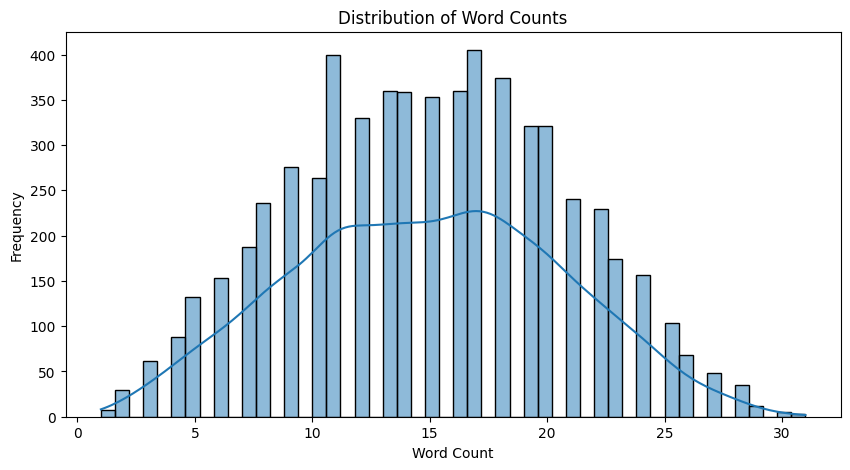

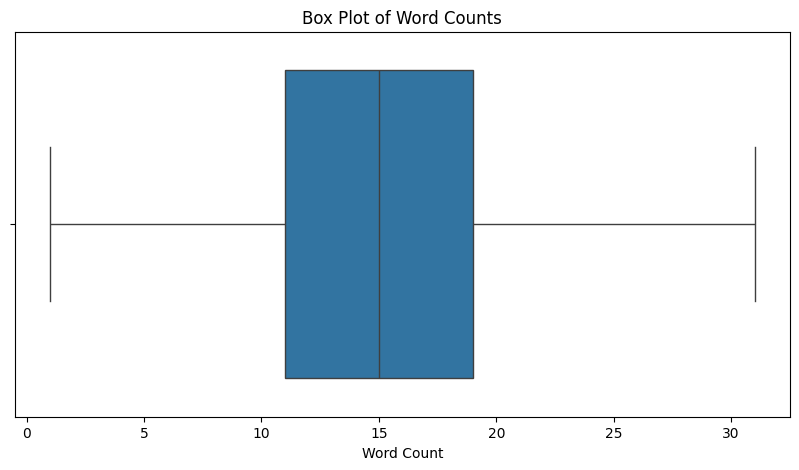

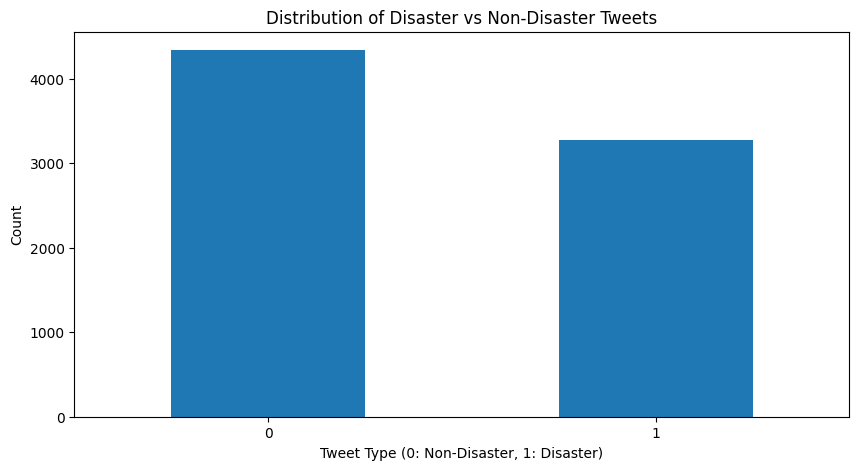

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions saved to /content/drive/My Drive/Final Project 256/sample_submission.csv
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Error Analysis:
Example 1:
Text: So you have a new weapon that can cause un-imaginable destruction.
True Label: 1.0, Predicted Label: 0

Example 2:
Text: DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q
True Label: 1.0, Predicted Label: 0

Example 3:
Text: in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3
True Label: 0.0, Predicted Label: 1

Example 4:
Text: my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS
True Label: 1.0, Predicted Label: 0

Example 5:
Text: @brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS
True Label: 1.0, Predi

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Mount Google Drive
drive.mount('/content/drive')

# Constants
BATCH_SIZE = 32
EPOCHS = 5
VAL_SPLIT = 0.2

# File Paths (updated for Google Drive)
base_path = "/content/drive/My Drive/Final Project 256/"
train_dataPath = base_path + "train.csv"
test_dataPath = base_path + "test.csv"
submissionPath = base_path + "sample_submission.csv"

# Check for GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

# Load Data
def readCSV(path, is_train=True):
    data = pd.read_csv(path)
    data['keyword'] = data['keyword'].fillna('')
    data['location'] = data['location'].fillna('')
    if is_train:
        return data[['id', 'keyword', 'location', 'text', 'target']]
    return data[['id', 'keyword', 'location', 'text']]

train_data = readCSV(train_dataPath, is_train=True)
test_data = readCSV(test_dataPath, is_train=False)

# Split Data
X = train_data["text"]
y = train_data["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

# Convert data to appropriate types
X_train = X_train.astype(str)
X_val = X_val.astype(str)
y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# Tokenization
vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=50)

# Ensure that the vectorizer is adapted to X_train
vectorizer.adapt(X_train)

# Convert the train and validation data into tensors after vectorization
train_texts = vectorizer(X_train)
val_texts = vectorizer(X_val)

# Model Definition
def build_model():
    model = models.Sequential([
        layers.Embedding(input_dim=10000, output_dim=64),
        layers.GlobalAveragePooling1D(),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use GPU if available
with tf.device('/GPU:0'):
    model = build_model()

    # Training
    history = model.fit(
        train_texts, y_train,
        validation_data=(val_texts, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE
    )

# Plot Metrics
def plot_metrics(history):
    plt.figure(figsize=(15, 5))

    # Loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/Final Project 256/training_curves.png')
    plt.show()

plot_metrics(history)

# Compute confusion matrix and metrics
y_pred = model.predict(val_texts)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_val, y_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_classes, average='binary')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/content/drive/My Drive/Final Project 256/confusion_matrix.png')
plt.show()

# Plot precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Precision, Recall, and F1 Score')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
plt.savefig('/content/drive/My Drive/Final Project 256/precision_recall_f1.png')
plt.show()

# Data Analysis
print("\nDataset Statistics:")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(test_data)}")

print("\nSample Input/Output Pairs:")
for i in range(5):
    print(f"Input: {X_train.iloc[i]}")
    print(f"Output: {y_train[i]}")  # Fixed line
    print()

# Word count statistics
word_counts = X_train.str.split().str.len()
print(f"Average word count: {word_counts.mean():.2f}")
print(f"Median word count: {word_counts.median():.2f}")
print(f"Max word count: {word_counts.max()}")
print(f"Min word count: {word_counts.min()}")

# Plot word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(word_counts, bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig('/content/drive/My Drive/Final Project 256/word_count_distribution.png')
plt.show()

# Plot word count box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=word_counts)
plt.title('Box Plot of Word Counts')
plt.xlabel('Word Count')
plt.savefig('/content/drive/My Drive/Final Project 256/word_count_boxplot.png')
plt.show()

# Plot histogram of disaster vs non-disaster tweets
plt.figure(figsize=(10, 5))
train_data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Type (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('/content/drive/My Drive/Final Project 256/tweet_type_distribution.png')
plt.show()

# Test Predictions
test_data["text"] = test_data["text"].astype(str)
test_texts = vectorizer(test_data["text"])

with tf.device('/GPU:0'):
    test_predictions = model.predict(test_texts)
test_data["target"] = (test_predictions > 0.5).astype(int)

# Save Predictions
test_data[["id", "target"]].to_csv(submissionPath, index=False)
print(f"Predictions saved to {submissionPath}")

# Error Analysis
error_examples = []
val_predictions = model.predict(val_texts)
val_pred_classes = (val_predictions > 0.5).astype(int)

for i in range(len(y_val)):
    if val_pred_classes[i] != y_val[i]:
        error_examples.append((X_val.iloc[i], y_val[i], val_pred_classes[i][0]))

print("\nError Analysis:")
for i, (text, true_label, pred_label) in enumerate(error_examples[:10]):
    print(f"Example {i+1}:")
    print(f"Text: {text}")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print()

###Improved model (DistilBERT pre-trained + learnable arameters)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Num GPUs Available:  0
TensorFlow version: 2.17.1
Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5550 - loss: 0.6857 - val_accuracy: 0.5739 - val_loss: 0.6579
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6077 - loss: 0.6469 - val_accuracy: 0.7091 - val_loss: 0.5846
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7612 - loss: 0.5456 - val_accuracy: 0.7965 - val_loss: 0.5049
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8159 - loss: 0.4455 - val_accuracy: 0.8037 - val_loss: 0.4639
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8445 - loss: 0.3739 - val_accuracy: 0.8043 - val_loss: 0.4809


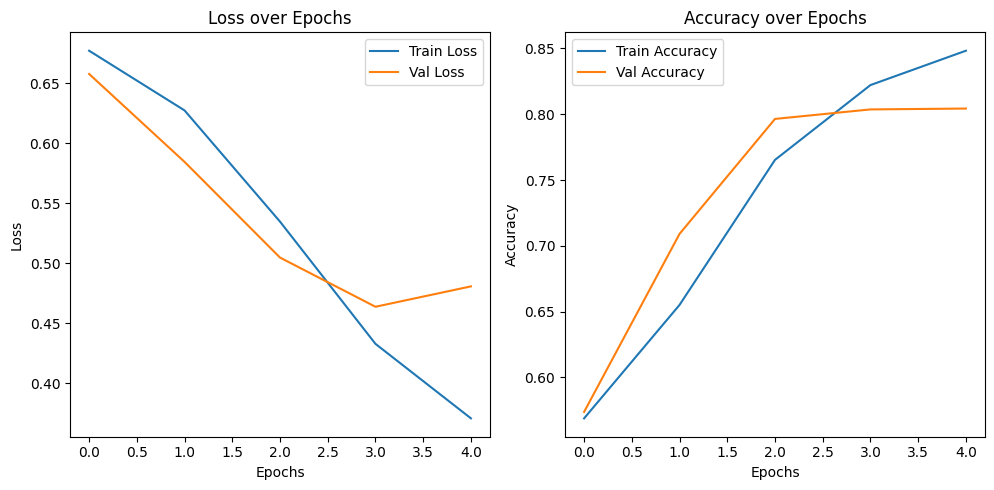

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


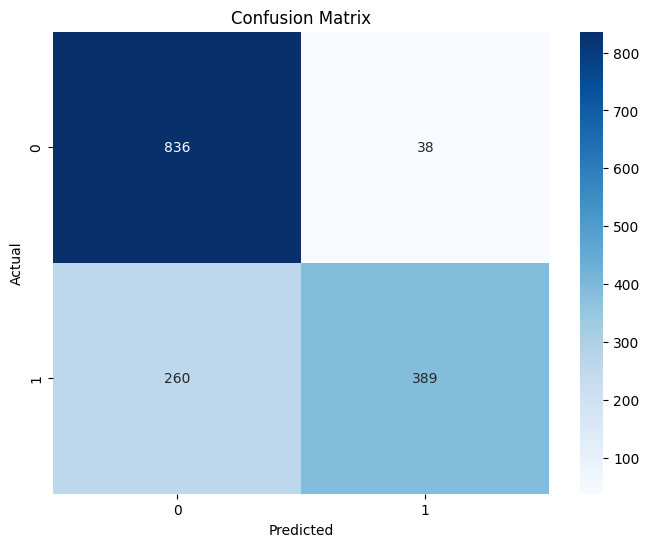

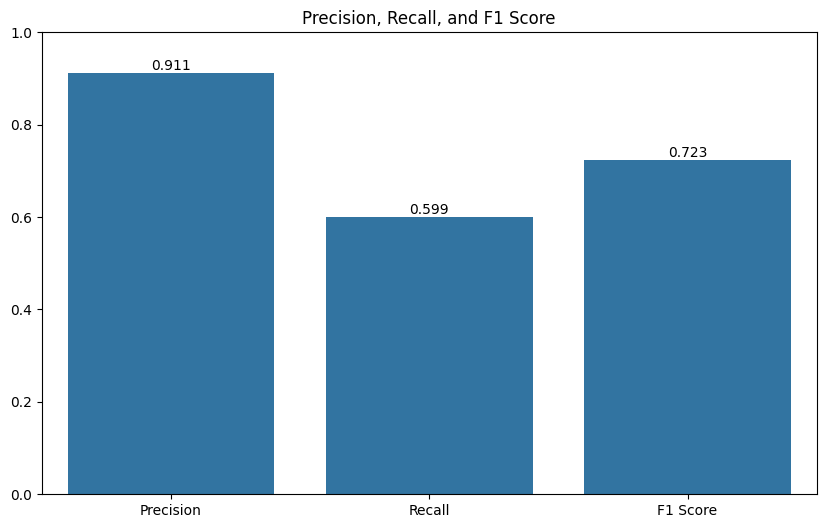


Dataset Statistics:
Training set size: 6090
Validation set size: 1523
Test set size: 3263

Sample Input/Output Pairs:
Input: Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR
Output: 1.0

Input: @ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears
Output: 0.0

Input: Tell @BarackObama to rescind medals of 'honor' given to US soldiers at the Massacre of Wounded Knee. SIGN NOW &amp; RT! https://t.co/u4r8dRiuAc
Output: 1.0

Input: Worried about how the CA drought might affect you? Extreme Weather: Does it Dampen Our Economy? http://t.co/fDzzuMyW8i
Output: 1.0

Input: @YoungHeroesID Lava Blast &amp; Power Red #PantherAttack @JamilAzzaini @alifaditha
Output: 0.0

Average word count: 14.91
Median word count: 15.00
Max word count: 31
Min word count: 1


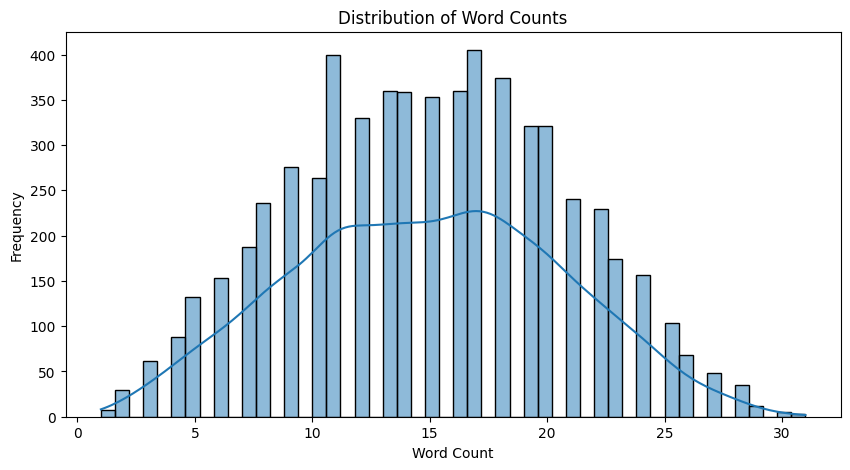

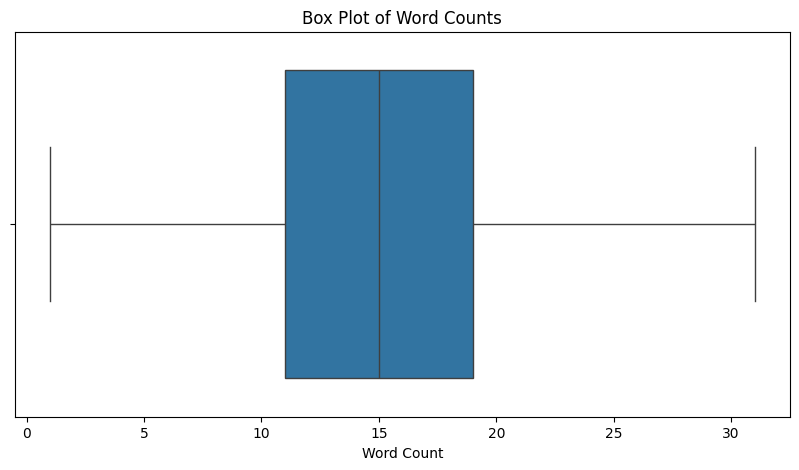

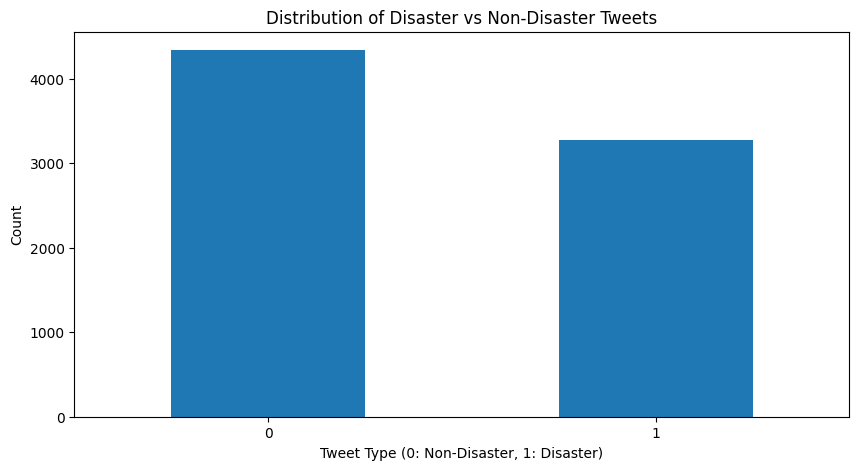

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions saved to /content/drive/My Drive/Final Project 256/sample_submission.csv
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Error Analysis:
Example 1:
Text: So you have a new weapon that can cause un-imaginable destruction.
True Label: 1.0, Predicted Label: 0

Example 2:
Text: DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q
True Label: 1.0, Predicted Label: 0

Example 3:
Text: my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS
True Label: 1.0, Predicted Label: 0

Example 4:
Text: @brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS
True Label: 1.0, Predicted Label: 0

Example 5:
Text: The Murderous Story Of AmericaÛªs First Hijacking http://t.co/EYUGk6byxr
True Label: 1.0, Predicted Label: 0

Example 6:
Text: 

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Mount Google Drive
drive.mount('/content/drive')

# Constants
BATCH_SIZE = 32
EPOCHS = 5
VAL_SPLIT = 0.2

# File Paths (updated for Google Drive)
base_path = "/content/drive/My Drive/Final Project 256/"
train_dataPath = base_path + "train.csv"
test_dataPath = base_path + "test.csv"
submissionPath = base_path + "sample_submission.csv"

# Check for GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

# Load Data
def readCSV(path, is_train=True):
    data = pd.read_csv(path)
    data['keyword'] = data['keyword'].fillna('')
    data['location'] = data['location'].fillna('')
    if is_train:
        return data[['id', 'keyword', 'location', 'text', 'target']]
    return data[['id', 'keyword', 'location', 'text']]

train_data = readCSV(train_dataPath, is_train=True)
test_data = readCSV(test_dataPath, is_train=False)

# Split Data
X = train_data["text"]
y = train_data["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

# Convert data to appropriate types
X_train = X_train.astype(str)
X_val = X_val.astype(str)
y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# Tokenization
vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=50)

# Ensure that the vectorizer is adapted to X_train
vectorizer.adapt(X_train)

# Convert the train and validation data into tensors after vectorization
train_texts = vectorizer(X_train)
val_texts = vectorizer(X_val)

# Model Definition
def build_model():
    model = models.Sequential([
        layers.Embedding(input_dim=10000, output_dim=64),
        layers.GlobalAveragePooling1D(),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use GPU if available
with tf.device('/GPU:0'):
    model = build_model()

    # Training
    history = model.fit(
        train_texts, y_train,
        validation_data=(val_texts, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE
    )

# Plot Metrics
def plot_metrics(history):
    plt.figure(figsize=(15, 5))

    # Loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/Final Project 256/training_curves.png')
    plt.show()

plot_metrics(history)

# Compute confusion matrix and metrics
y_pred = model.predict(val_texts)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_val, y_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_classes, average='binary')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/content/drive/My Drive/Final Project 256/confusion_matrix.png')
plt.show()

# Plot precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Precision, Recall, and F1 Score')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')
plt.savefig('/content/drive/My Drive/Final Project 256/precision_recall_f1.png')
plt.show()

# Data Analysis
print("\nDataset Statistics:")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(test_data)}")

print("\nSample Input/Output Pairs:")
for i in range(5):
    print(f"Input: {X_train.iloc[i]}")
    print(f"Output: {y_train[i]}")  # Fixed line
    print()

# Word count statistics
word_counts = X_train.str.split().str.len()
print(f"Average word count: {word_counts.mean():.2f}")
print(f"Median word count: {word_counts.median():.2f}")
print(f"Max word count: {word_counts.max()}")
print(f"Min word count: {word_counts.min()}")

# Plot word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(word_counts, bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig('/content/drive/My Drive/Final Project 256/word_count_distribution.png')
plt.show()

# Plot word count box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=word_counts)
plt.title('Box Plot of Word Counts')
plt.xlabel('Word Count')
plt.savefig('/content/drive/My Drive/Final Project 256/word_count_boxplot.png')
plt.show()

# Plot histogram of disaster vs non-disaster tweets
plt.figure(figsize=(10, 5))
train_data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Type (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('/content/drive/My Drive/Final Project 256/tweet_type_distribution.png')
plt.show()

# Test Predictions
test_data["text"] = test_data["text"].astype(str)
test_texts = vectorizer(test_data["text"])

with tf.device('/GPU:0'):
    test_predictions = model.predict(test_texts)
test_data["target"] = (test_predictions > 0.5).astype(int)

# Save Predictions
test_data[["id", "target"]].to_csv(submissionPath, index=False)
print(f"Predictions saved to {submissionPath}")

# Error Analysis
error_examples = []
val_predictions = model.predict(val_texts)
val_pred_classes = (val_predictions > 0.5).astype(int)

for i in range(len(y_val)):
    if val_pred_classes[i] != y_val[i]:
        error_examples.append((X_val.iloc[i], y_val[i], val_pred_classes[i][0]))

print("\nError Analysis:")
for i, (text, true_label, pred_label) in enumerate(error_examples[:10]):
    print(f"Example {i+1}:")
    print(f"Text: {text}")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print()